## Quantum Measurement Tomography with Stochastic Gradient Descent (SGD-QMT)
This notebook provides basic tutorial on how to use SGD-QMT code to compute POVM operators. For demonstration purpose, we consider 3-qubit computational basis projectors. However, the code is general and can be implemented to compute any type of POVM set. 

##### Make sure all the libraries imported in SGD_QMT.py are installed!

In [24]:
import sys
sys.path.insert(0, '..')
from SGD_QMT import *

### Example demonstration: 3-qubit system and target POVMs are computational basis projectors (measurement in Pauli-z basis) 

In [25]:
# Qubit system
n_qubits = 3
dimension = 2 ** n_qubits

# number of target POVM elements 
num_povms = 2**n_qubits


# Create random seed and PRNGKey to generate random intial guess
seed = int(time.time_ns() % (2**32))
print(f"Using seed for true povm: {seed}")
key_true = jax.random.PRNGKey(seed)


# Target POVMs
true_povms = computational_basis_projectors(n_qubits)


# Input probe states
probe_states = get_default_probe_states(n_qubits)


# Target probabilities (This is your experimental data)
target_probs = simulate_measurements(true_povms, probe_states)


Using seed for true povm: 3320915344


### Method 1: HONEST-MSE
Here we implement SGD-QMT using HONEST parametrization with MSE as a loss function. 

Seed value: 3355645344
Training system with 8 POVMs using 'mse' loss


Step 499, Loss: 6.90278e-08: 100%|██████████| 500/500 [00:01<00:00, 389.11it/s]


Total training time: 1.29 seconds


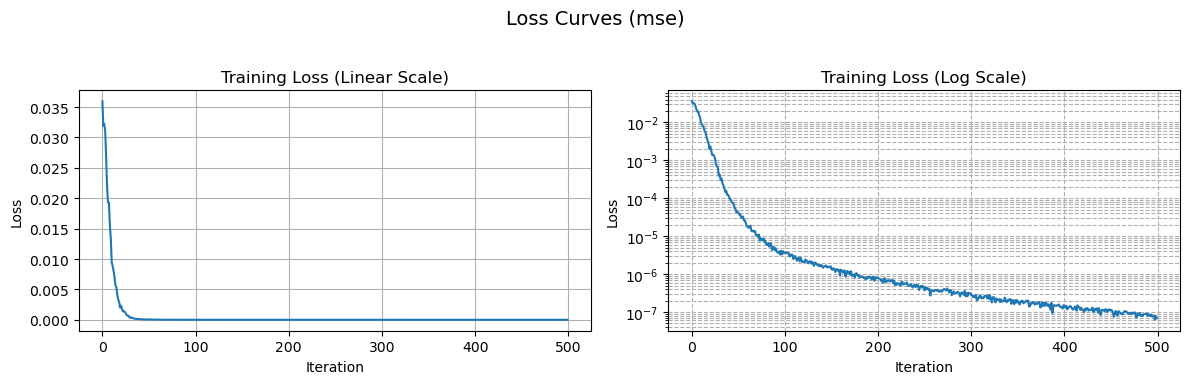

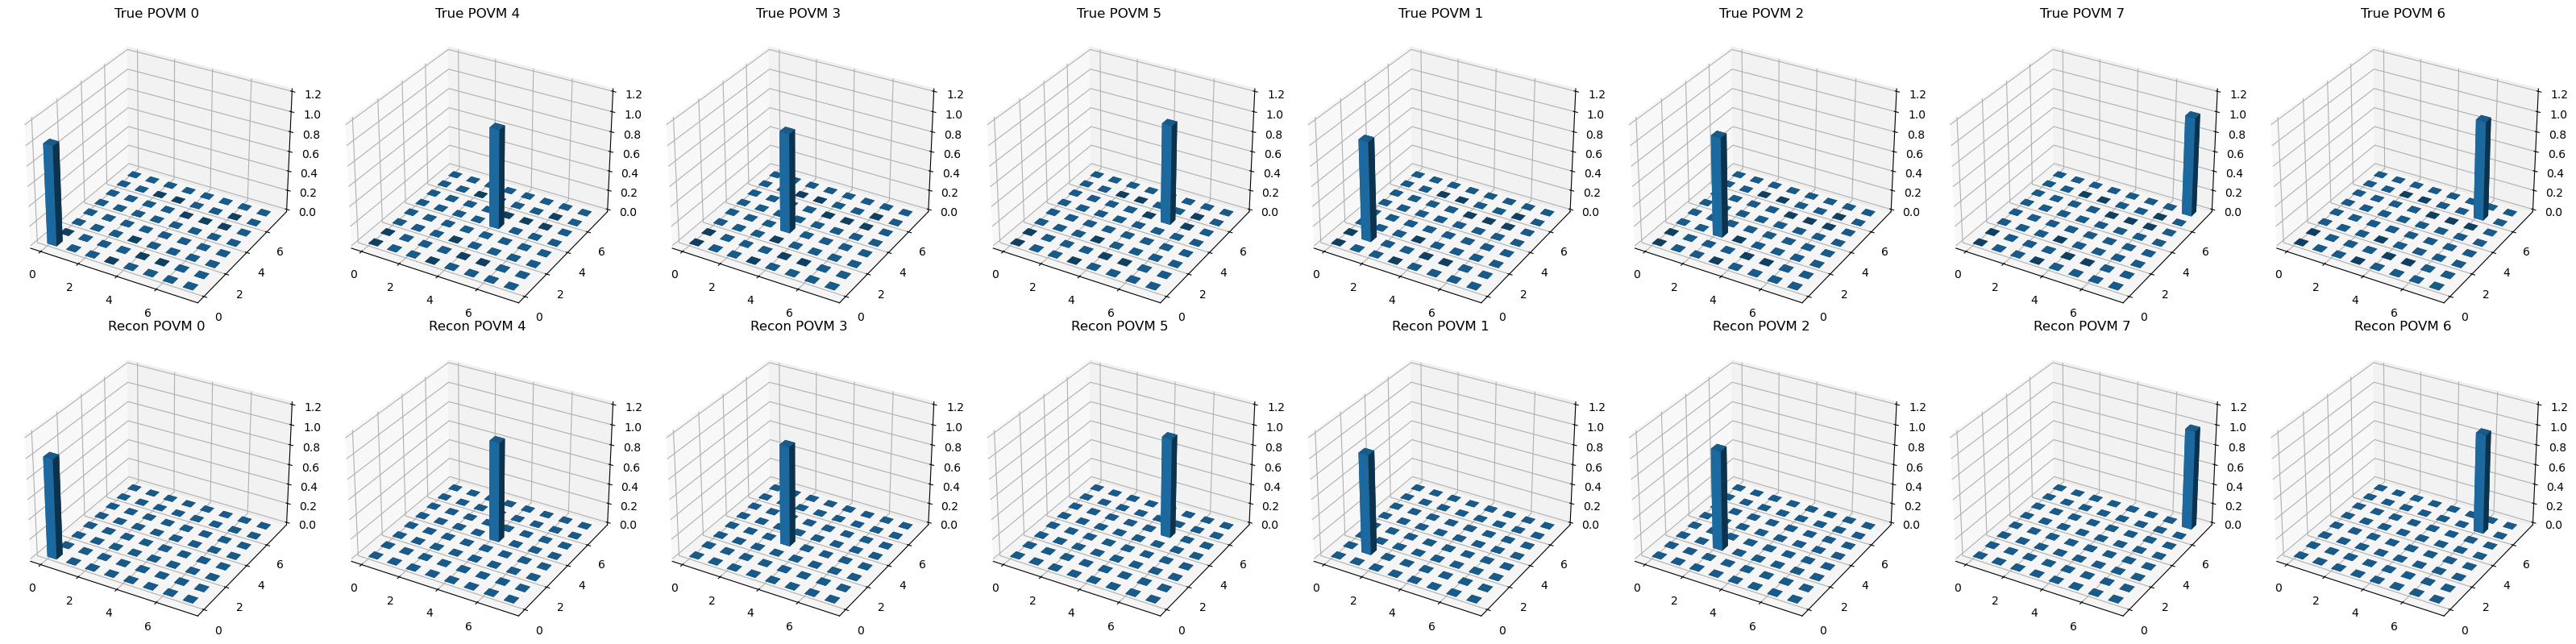

Frobenius norm : 0.0000050825 ± 0.00011408021
Wasserstein    : 0.0001683457 ± 0.00000219148


In [26]:
# Run main SGD-QMT function based on HONEST parameterization with MSE loss
recon_povms, final_probs, losses, times, recon_povms_step, total_time = Run_HonestQMT_StatePovmBatched(dimension, num_povms, rank=dimension, state_batch_size=50, povm_batch_size=num_povms,
                                                                                                        learning_rate=1e-2, n_steps=500, stop=1e-10,
                                                                                     probe_states=probe_states, target_probs=target_probs, LossPlot=True, seed=None, loss_type="mse")

# Graphically compare how well POVMs are constructed
compare_povms_3d_random(true_povms, recon_povms, 8)

# Evaluate quality of reconstructed POVMs
frob_mean, wasserstein_mean, frob_std, wasserstein_std = evaluate_metrics(recon_povms, true_povms, probe_states, target_probs)

print(f"Frobenius norm : {frob_mean:.10f} ± {frob_std:.11f}")
print(f"Wasserstein    : {wasserstein_mean:.10f} ± {wasserstein_std:.11f}")


### Method 2:  HONEST-MLE
Here we implement SGD-QMT using HONEST parametrization with MLE as a loss function. 

Seed value: 1394778048
Training system with 8 POVMs using 'mle' loss


Step 499, Loss: 1.23034e-01: 100%|██████████| 500/500 [00:01<00:00, 417.99it/s]


Total training time: 1.20 seconds


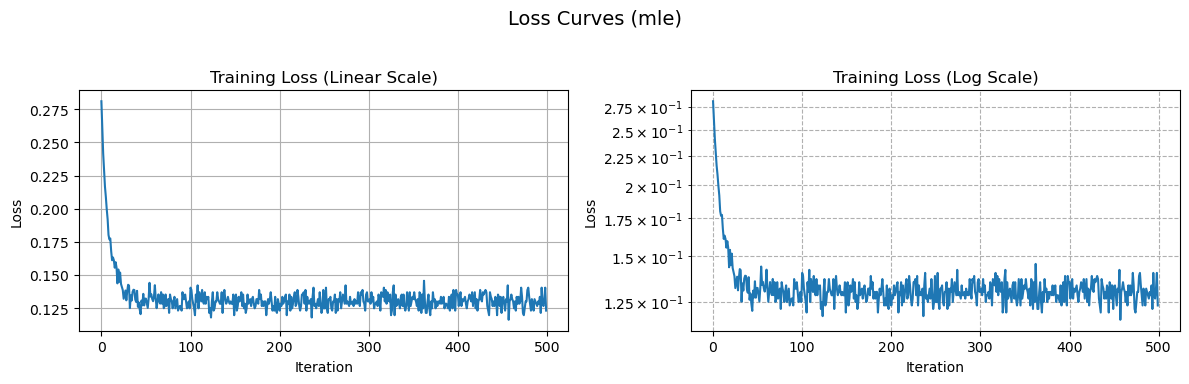

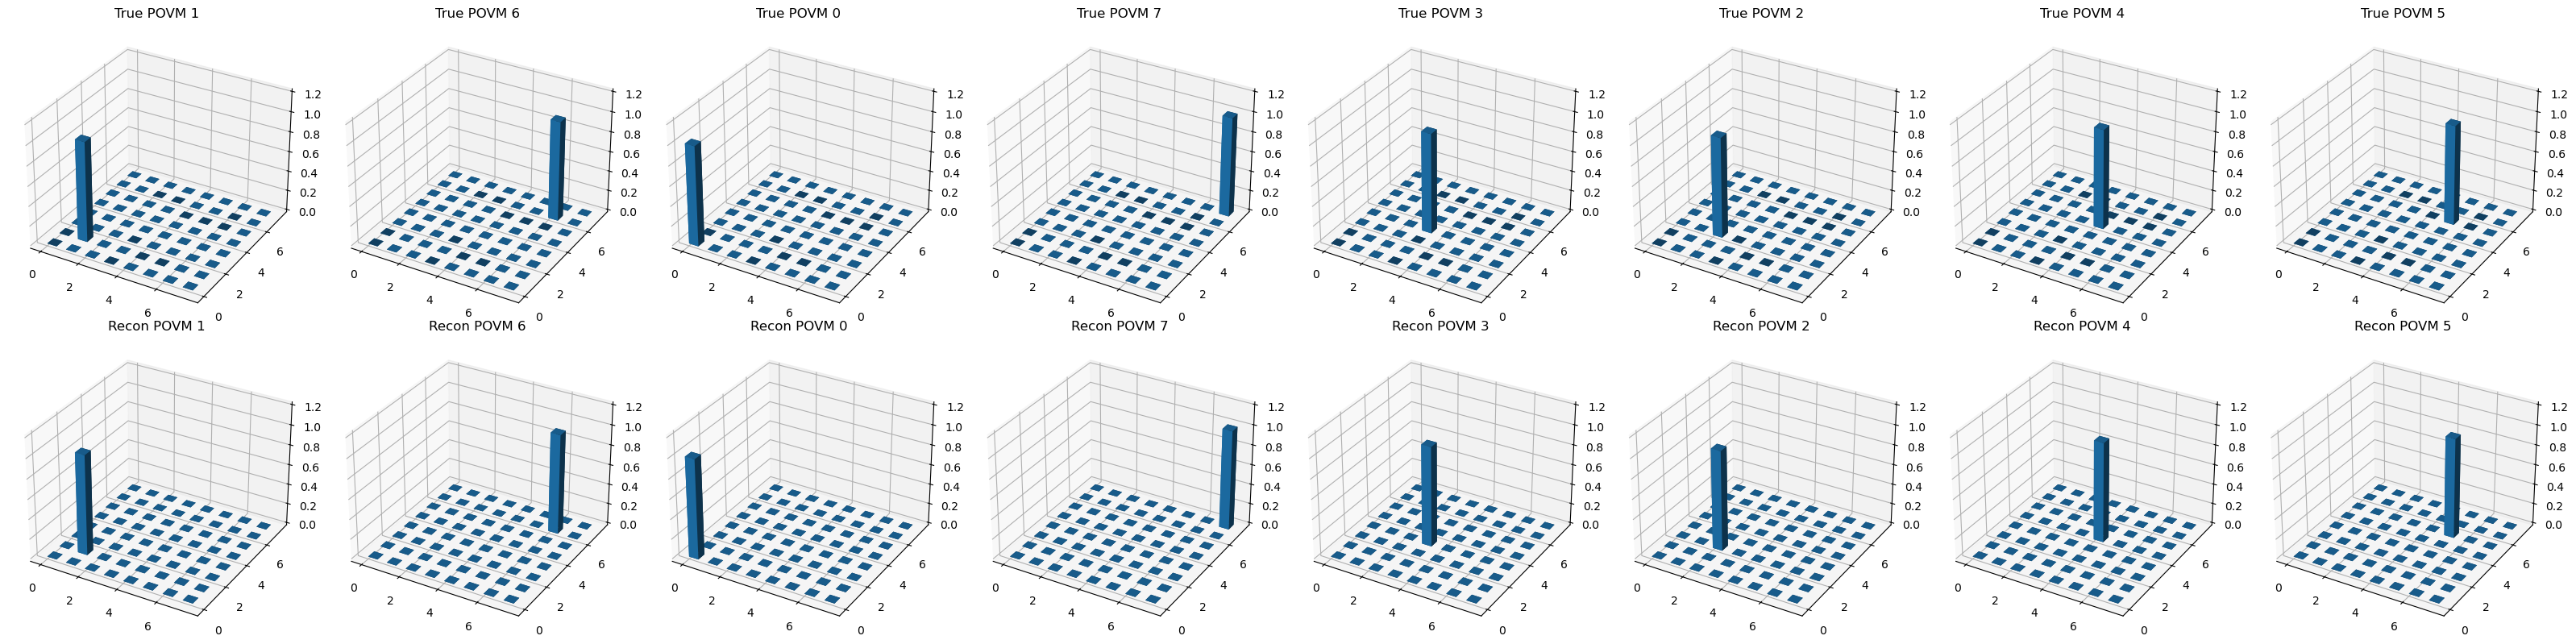

Frobenius norm : 0.0000000189 ± 0.00000000000
Wasserstein    : 0.0000000378 ± 0.00000000000


In [27]:

# Run main SGD-QMT function based on HONEST parameterization with MLE loss
recon_povms, final_probs, losses, times, recon_povms_step, total_time = Run_HonestQMT_StatePovmBatched(dimension, num_povms, rank=dimension, state_batch_size=50, povm_batch_size=num_povms,
                                                                                                        learning_rate=1e-2, n_steps=500, stop=1e-10,
                                                                                     probe_states=probe_states, target_probs=target_probs, LossPlot=True, seed=None, loss_type="mle")

# Graphically compare how well POVMs are constructed
compare_povms_3d_random(true_povms, recon_povms, 8)

# Evaluate quality of reconstructed POVMs
frob_mean, wasserstein_mean, frob_std, wasserstein_std = evaluate_metrics(recon_povms, true_povms, probe_states, target_probs)

print(f"Frobenius norm : {frob_mean:.10f} ± {frob_std:.11f}")
print(f"Wasserstein    : {wasserstein_mean:.10f} ± {wasserstein_std:.11f}")

### Method 3:  SM-MSE
Here we implement SGD-QMT using Stiefel Manifold (SM) parametrization with MSE as a loss function. 

Seed value for initial guess for Run_StiefelManiQMT_StatePovmBatched: 3575106048
Training system with 8 POVMs


Training:   0%|          | 0/500 [00:00<?, ?it/s]/Users/akshayga/anaconda3/lib/python3.11/site-packages/jax/_src/lax/lax.py:2785: ComplexWarning: Casting complex values to real discards the imaginary part
  x_bar = _convert_element_type(x_bar, x.aval.dtype, x.aval.weak_type)
Step 499, Loss: 8.67560e-06: 100%|██████████| 500/500 [00:00<00:00, 549.53it/s]


Total training time for Run_StiefelManiQMT_StatePovmBatched: 0.91 seconds


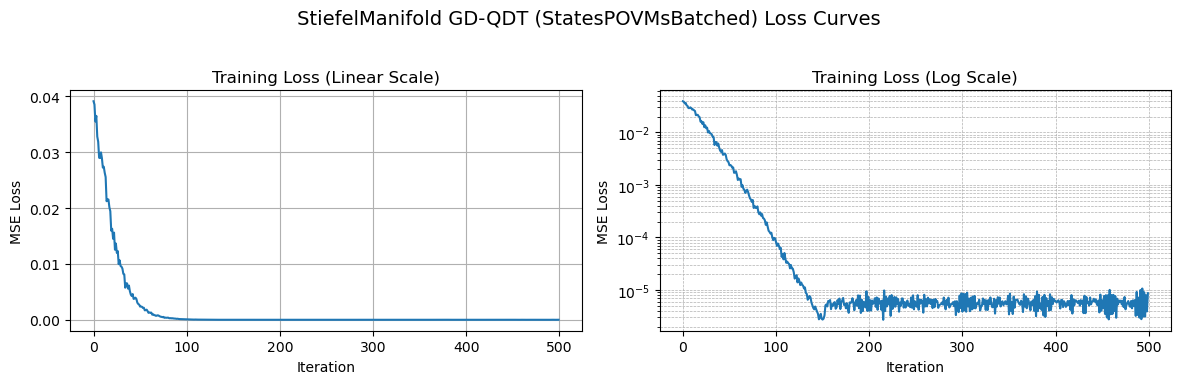

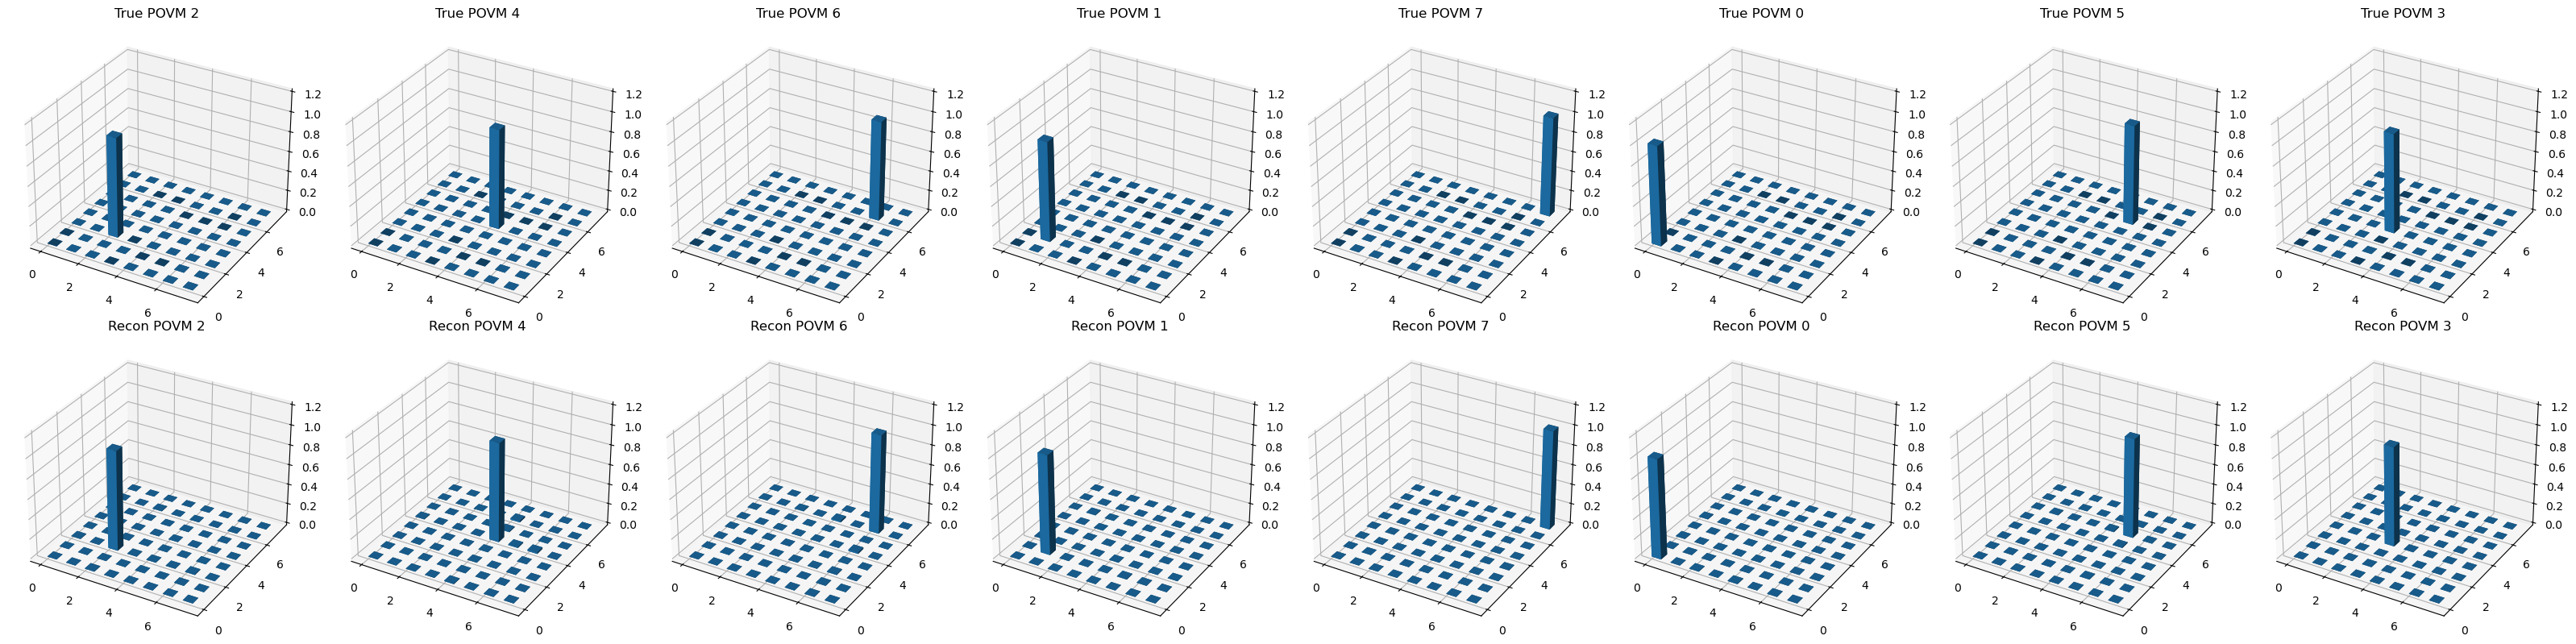

Frobenius norm : 0.0002074417 ± 0.00091079300
Wasserstein    : 0.0008877768 ± 0.00023708754


In [28]:
# Run main SGD-QMT function based on SM parameterization with MSE loss
recon_povms, final_probs, losses, times, recon_povms_step, total_time = Run_StiefelManiQMT_StatePovmBatched(dimension, num_povms, rank=dimension, state_batch_size=50, 
                                                                                                            povm_batch_size=num_povms, learning_rate=5e-2, decay=0.99, 
                                                                                            n_steps=500, stop=1e-10, probe_states=probe_states, target_probs=target_probs, 
                                                                                            LossPlot=True, seed=None, loss_type="mse")

# Graphically compare how well POVMs are constructed
compare_povms_3d_random(true_povms, recon_povms, 8)

# Evaluate quality of reconstructed POVMs
frob_mean, wasserstein_mean, frob_std, wasserstein_std = evaluate_metrics(recon_povms, true_povms, probe_states, target_probs)

print(f"Frobenius norm : {frob_mean:.10f} ± {frob_std:.11f}")
print(f"Wasserstein    : {wasserstein_mean:.10f} ± {wasserstein_std:.11f}")

### Method 4: SM-MLE
Here we implement SGD-QMT using Stiefel Manifold (SM) parametrization with MLE as a loss function. 

Seed value for initial guess for Run_StiefelManiQMT_StatePovmBatched: 1138422752
Training system with 8 POVMs


Training:   0%|          | 0/500 [00:00<?, ?it/s]/Users/akshayga/anaconda3/lib/python3.11/site-packages/jax/_src/lax/lax.py:2785: ComplexWarning: Casting complex values to real discards the imaginary part
  x_bar = _convert_element_type(x_bar, x.aval.dtype, x.aval.weak_type)
Step 499, Loss: 1.36991e-01: 100%|██████████| 500/500 [00:00<00:00, 583.68it/s]


Total training time for Run_StiefelManiQMT_StatePovmBatched: 0.86 seconds


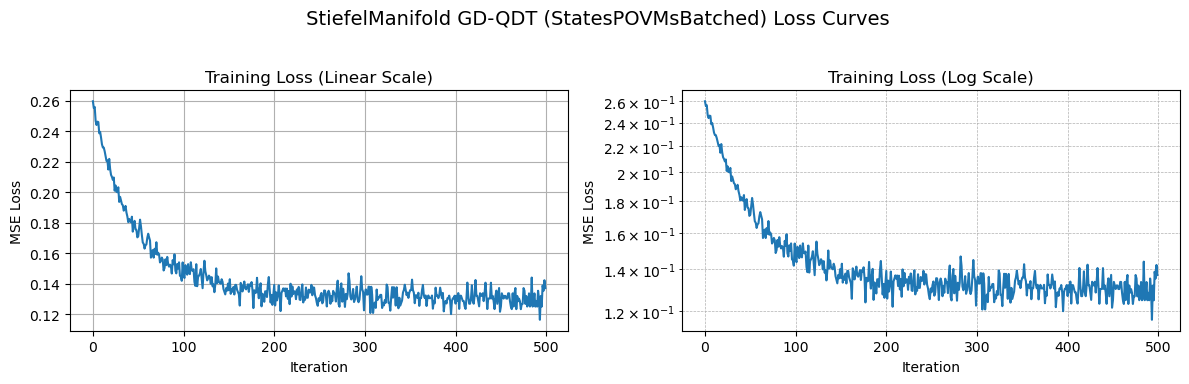

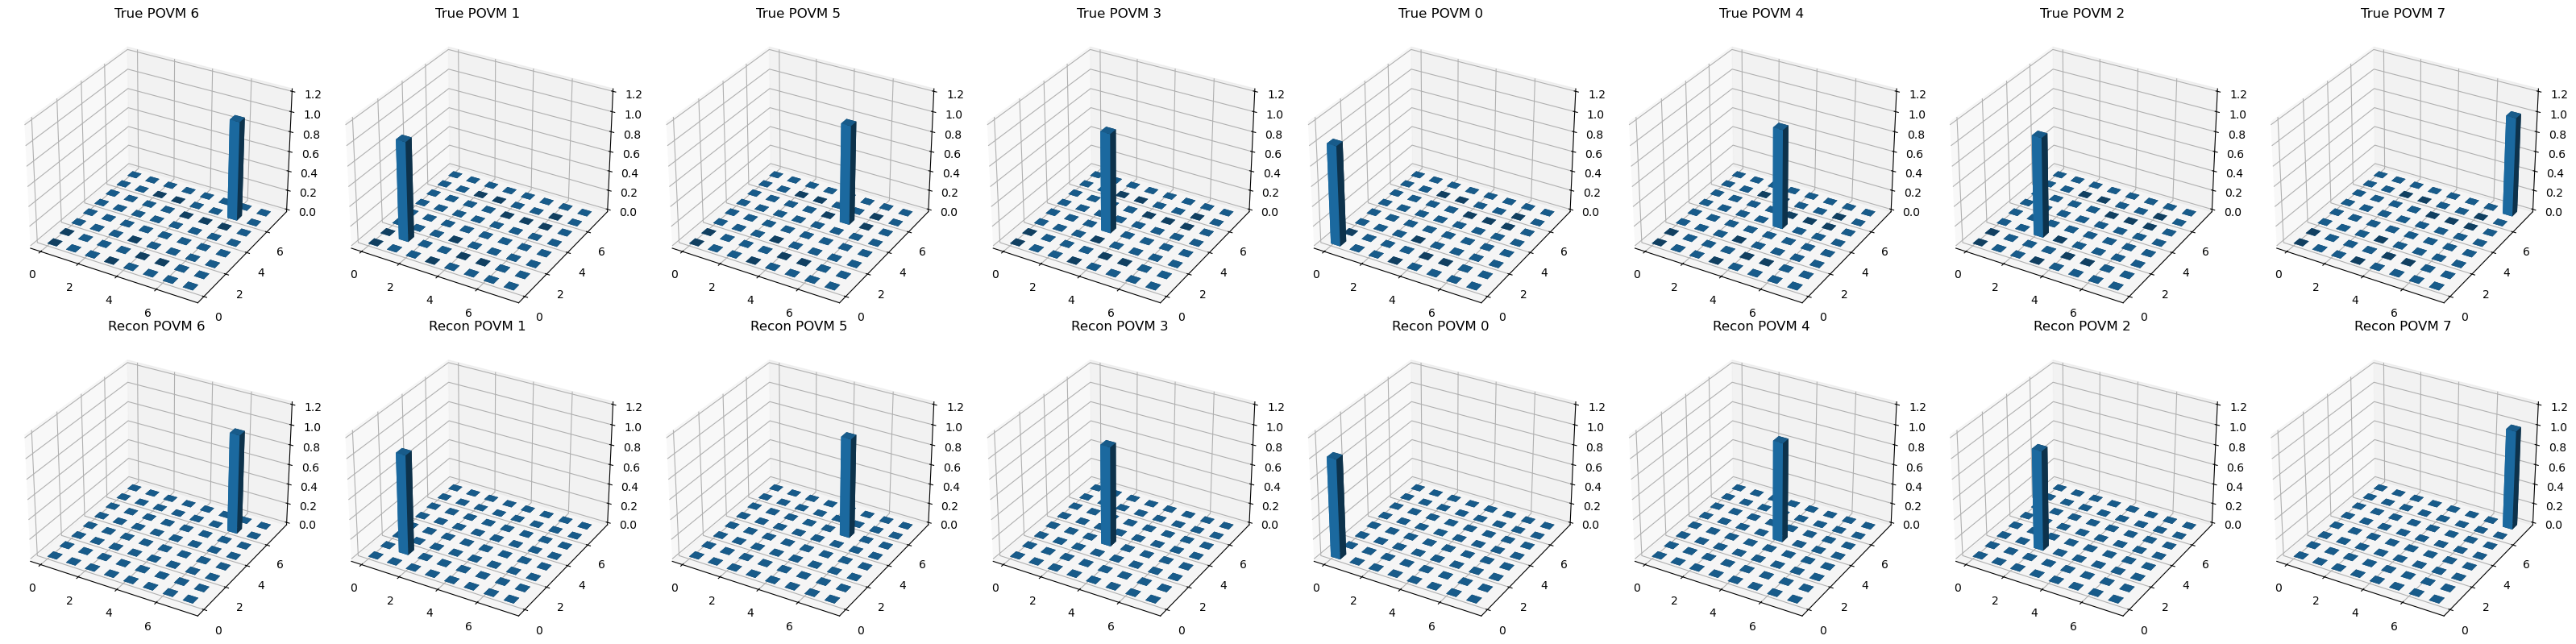

Frobenius norm : 0.0000167777 ± 0.00000288031
Wasserstein    : 0.0002278384 ± 0.00021719019


In [29]:
# Run main SGD-QMT function based on SM parameterization with MLE loss
recon_povms, final_probs, losses, times, recon_povms_step, total_time = Run_StiefelManiQMT_StatePovmBatched(dimension, num_povms, rank=dimension, state_batch_size=50, 
                                                                                                            povm_batch_size=num_povms, learning_rate=5e-2, decay=0.99, 
                                                                                            n_steps=500, stop=1e-10, probe_states=probe_states, target_probs=target_probs, 
                                                                                            LossPlot=True, seed=None, loss_type="mle")

# Graphically compare how well POVMs are constructed
compare_povms_3d_random(true_povms, recon_povms, 8)

# Evaluate quality of reconstructed POVMs
frob_mean, wasserstein_mean, frob_std, wasserstein_std = evaluate_metrics(recon_povms, true_povms, probe_states, target_probs)

print(f"Frobenius norm : {frob_mean:.10f} ± {frob_std:.11f}")
print(f"Wasserstein    : {wasserstein_mean:.10f} ± {wasserstein_std:.11f}")